<a href="https://colab.research.google.com/github/aleaguilar0094-ops/Mexican-National-Survey/blob/main/Encuesta_Nacional_sobre_Disponibilidad_y_Uso_de_Tecnolog%C3%ADas_de_la_Informaci%C3%B3n_en_los_Hogares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


INEGI, 2024. Encuesta Nacional sobre Disponibilidad y Uso de Tecnologías de la Información en los Hogares (ENDUTIH). Retrieve from https://www.inegi.org.mx/programas/endutih/2024/ [Accessed 13 January 2024].



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
hogares=pd.read_csv('/content/drive/My Drive/Colab Notebooks/conjunto_de_datos_endutih_2024_csv/conjunto_de_datos/tr_endutih_hogares_anual_2024.csv')

/tmp/ipython-input-2048996808.py:1: DtypeWarning: Columns (29,35,94) have mixed types. Specify dtype option on import or set low_memory=False.
  hogares=pd.read_csv('/content/drive/My Drive/Colab Notebooks/conjunto_de_datos_endutih_2024_csv/conjunto_de_datos/tr_endutih_hogares_anual_2024.csv')


In [ ]:
diccionario_hogares=pd.read_csv('/content/drive/My Drive/Colab Notebooks/conjunto_de_datos_endutih_2024_csv/diccionario_de_datos/diccionario_de_datos_tr_endutih_hogares_anual_2024.csv')

In [ ]:
hogares = hogares.astype({
    'P4_6A': str,
    'P4_6_3': str,
    'P5_13A': str,
})

In [ ]:
hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58080 entries, 0 to 58079
Columns: 104 entries, UPM to ESTATUS
dtypes: float64(57), int64(38), object(9)
memory usage: 46.1+ MB


In [ ]:
na_count = hogares.isna().sum()
lista_columnas_con_na = []
for i, (col, count) in enumerate(na_count.items()):
    pregunta = diccionario_hogares.iloc[i,1]
    lista_columnas_con_na.append(f"{i}; {col}; {pregunta.replace("\n", " ")}; {count} \n")


with open("columnas_con_na.txt", "w", encoding="utf-8") as f:
    f.writelines(lista_columnas_con_na)

6; P4_1_4; 4.1 Por favor, dígame si disponen de los siguientes bienes: Pantalla plana (televisor digital, LCD o LED); 0 null, 9735 2 = "NO"

In [ ]:
hogares['P4_1_4'].value_counts().get(2, 0)

np.int64(9735)

7; P4_1_4_1; 4.1 Por favor, dígame si disponen de los siguientes bienes:  Pantalla plana (televisor digital, LCD o LED)  En total,  ¿de cuántas pantallas planas disponen?; 9735  NULL

8; P4_1_4_2; 4.1 Por favor, dígame si disponen de los siguientes bienes: Pantalla plana (televisor digital, LCD o LED) ¿En total, de cuántas pantallas planas disponen? ¿Cuántas de estas cuentan con funciones de SmartTV (que se conecte directamente a internet o mediante un dispositivo)?; 9735 NULL

10; P4_1_6; 4.1 Por favor, dígame si disponen de los siguientes bienes:  Teléfono celular móvil (por cualquiera de los integrantes); 0

In [ ]:
hogares['P4_1_6'].value_counts().get(2, 0)

np.int64(2848)

11; P4_1_6_1; 4.1 Por favor, dígame si disponen de los siguientes bienes:  Teléfono celular móvil (por cualquiera de los integrantes) En total, ¿de cuántos teléfonos celulares disponen en el hogar?; 2848

12; P4_1_6_2; 4.1 Por favor, dígame si disponen de los siguientes bienes:  Teléfono celular móvil (por cualquiera de los integrantes) ¿Cuántos de estos son celulares inteligentes (Smartphone)?; 2848

13; P4_2_1_1; 4.2 ¿Disponen de...  computadora de escritorio (Teclado, monitor y CPU se encuentran separados)?; 0

14; P4_2_1_2; 4.2 ¿Disponen de...  computadora de escritorio (Teclado, monitor y CPU se encuentran separados)?  ¿Cuántas computadoras de escritorio?; 51637 null

In [ ]:
hogares['P4_2_1_1'].value_counts().get(2, 0)

np.int64(51637)

15; P4_2_2_1; 4.2 ¿Disponen de...  computadora portátil (teclado, monitor y CPU se encuentran integrados físicamente)?; 0

16; P4_2_2_2; 4.2 ¿Disponen de...  computadora de escritorio (Teclado, monitor y CPU se encuentran separados)?  ¿Cuántas computadoras de portátiles?; 38381

In [ ]:
hogares['P4_2_2_1'].value_counts().get(2, 0)

np.int64(38381)

17; P4_2_3_1; 4.2 ¿Disponen de...  Tablet (teclado y puntero virtuales en la pantalla táctil)?; 0

18; P4_2_3_2; 4.2 ¿Disponen de...  computadora de escritorio (Teclado, monitor y CPU se encuentran separados)?  ¿Cuántas tablet?; 48376

In [ ]:
hogares['P4_2_3_1'].value_counts().get(2, 0)

np.int64(48376)

In [ ]:
hogares[['P4_1_4_1', 'P4_1_4_2', 'P4_1_6_1', 'P4_1_6_2', 'P4_2_1_2', 'P4_2_2_2' ,'P4_2_3_2']] = hogares[['P4_1_4_1', 'P4_1_4_2', 'P4_1_6_1', 'P4_1_6_2', 'P4_2_1_2' , 'P4_2_2_1','P4_2_3_2']].fillna(0)

<Axes: xlabel='P4_3'>

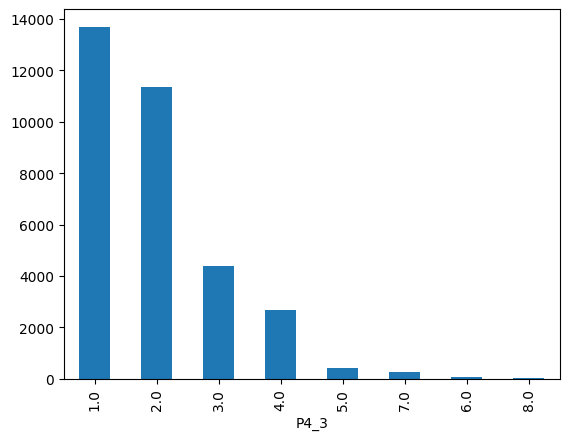

In [ ]:
hogares['P4_3'].value_counts().plot(kind='bar')

In [ ]:
conteo = (
    ((hogares['P4_2_1_1'] == 2) |
    (hogares['P4_2_2_1'] == 2) |
    (hogares['P4_2_3_1'] == 2)
    ) &
    (hogares['P4_3'].isna())
).sum()
print(conteo)

23372


*Si no tienen computadora, laptop o Tablet es seguro que no va tener los otros equipos*

## Tratamiento de valores nulos de la pregunta P4_3 ¿Por qué no disponen de computadora, laptop o Tablet?

In [ ]:
columnas_data_P4_3_sinNA = hogares.columns[3:20].difference(hogares.columns[[7, 8, 11, 12, 14, 16, 18]])
data_P4_3_sinNA = hogares.loc[hogares.iloc[:, 20].notna(), columnas_data_P4_3_sinNA]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data_P4_3_sinNA.drop(columns='P4_3')
y = data_P4_3_sinNA['P4_3']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Borrador

In [ ]:
diccionario_hogares.loc[[17]]

,COLUMNA,DESCRIPCION,TIPO_DATO,LONGITUD,CODIGO_VALIDO,METADATOS
17,P4_2_3_1,4.2 ¿Disponen de... \nTablet (teclado y punter...,Varchar,1,[1-2],"1 Sí, 2 No"


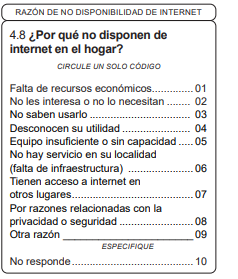

In [ ]:
hogares_1 = hogares.iloc[:, 3:]
hogares_1 = hogares_1.drop(hogares_1.columns[[98, 99, 100]], axis=1)
hogares_1.head()

,P4_1_1,P4_1_2,P4_1_3,P4_1_4,P4_1_4_1,P4_1_4_2,P4_1_5,P4_1_6,P4_1_6_1,P4_1_6_2,...,P5_13_8,P5_13_9,P5_13_10,P5_13A,FAC_HOG,UPM_DIS,EST_DIS,DOMINIO,TLOC,ESTRATO
0,1,1,1,1,1.0,1.0,1,1,3.0,3.0,...,2,2,2,nan,303,1,1,U,1,2
1,1,2,1,1,1.0,1.0,2,1,1.0,0.0,...,2,2,2,nan,303,1,1,U,1,2
2,2,2,1,1,3.0,2.0,2,1,7.0,7.0,...,2,2,2,nan,303,1,1,U,1,2
3,2,2,2,2,NaN,NaN,2,1,1.0,1.0,...,2,2,2,nan,303,1,1,U,1,2
4,2,2,2,1,2.0,2.0,1,1,3.0,3.0,...,2,2,2,nan,303,1,1,U,1,2


<Axes: xlabel='P4_8'>

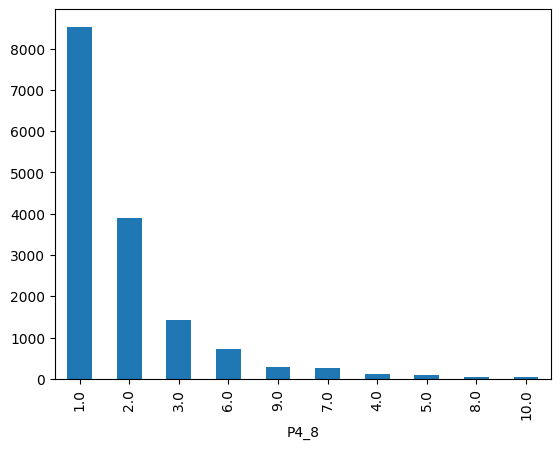

In [ ]:
hogares_1['P4_8'].value_counts().plot(kind='bar')

https://www.google.com/search?q=An%C3%A1lisis+de+Correspondencias+M%C3%BAltiples&ie=UTF-8

Tipos de usuarios según servicios

Perfiles de acceso a comunicación

Segmentos de hogares / personas

Patrones de combinación de servicios

In [ ]:
residentes=pd.read_csv('/content/drive/My Drive/Colab Notebooks/conjunto_de_datos_endutih_2024_csv/conjunto_de_datos/tr_endutih_residentes_anual_2024.csv')

In [ ]:
residentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194033 entries, 0 to 194032
Data columns (total 27 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UPM        194033 non-null  int64  
 1   VIV_SEL    194033 non-null  int64  
 2   HOGAR      194033 non-null  int64  
 3   NUM_REN    194033 non-null  int64  
 4   PAREN      194033 non-null  int64  
 5   SEXO       194033 non-null  int64  
 6   EDAD       194033 non-null  int64  
 7   DIA        179175 non-null  float64
 8   MES        179175 non-null  float64
 9   P3_7       179175 non-null  float64
 10  NIVEL      179175 non-null  float64
 11  GRADO      179175 non-null  float64
 12  P3_9_1     179175 non-null  float64
 13  P3_9_2     179175 non-null  float64
 14  P3_9_3     179175 non-null  float64
 15  P3_10      160103 non-null  float64
 16  P3_11      64600 non-null   float64
 17  P3_12      98802 non-null   float64
 18  FAC_HOGAR  194033 non-null  int64  
 19  UPM_DIS    194033 non-n

In [ ]:
usuarios=pd.read_csv('/content/drive/My Drive/Colab Notebooks/conjunto_de_datos_endutih_2024_csv/conjunto_de_datos/tr_endutih_usuarios_anual_2024.csv')

/tmp/ipython-input-2784063671.py:1: DtypeWarning: Columns (20,28,46,60,70,84,128,170,204,210) have mixed types. Specify dtype option on import or set low_memory=False.
  usuarios=pd.read_csv('/content/drive/My Drive/Colab Notebooks/conjunto_de_datos_endutih_2024_csv/conjunto_de_datos/tr_endutih_usuarios_anual_2024.csv')


In [ ]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58080 entries, 0 to 58079
Columns: 231 entries, UPM to ESTATUS
dtypes: float64(190), int64(18), object(23)
memory usage: 102.4+ MB


In [ ]:
usuarios2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/conjunto_de_datos_endutih_2024_csv/conjunto_de_datos/tr_endutih_usuarios2_anual_2024.csv')

/tmp/ipython-input-2417444531.py:1: DtypeWarning: Columns (27,40,66) have mixed types. Specify dtype option on import or set low_memory=False.
  usuarios2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/conjunto_de_datos_endutih_2024_csv/conjunto_de_datos/tr_endutih_usuarios2_anual_2024.csv')


In [ ]:
usuarios2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58080 entries, 0 to 58079
Data columns (total 94 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UPM      58080 non-null  int64  
 1   VIV_SEL  58080 non-null  int64  
 2   HOGAR    58080 non-null  int64  
 3   NUM_REN  58080 non-null  int64  
 4   EDAD     58080 non-null  int64  
 5   P8_1     58080 non-null  int64  
 6   P8_2     9006 non-null   float64
 7   P8_2A    640 non-null    object 
 8   P8_3     58080 non-null  int64  
 9   P8_4_1   50587 non-null  float64
 10  P8_4_2   50587 non-null  float64
 11  P8_5_1   2321 non-null   float64
 12  P8_5_2   48356 non-null  float64
 13  P8_6     50587 non-null  float64
 14  P8_7_1   50587 non-null  float64
 15  P8_7_2   50587 non-null  float64
 16  P8_7_3   50587 non-null  float64
 17  P8_8     47969 non-null  float64
 18  P8_9     50587 non-null  float64
 19  P8_10_1  45240 non-null  float64
 20  P8_10_2  50587 non-null  float64
 21  P8_10_3  505

In [ ]:
viviendas=pd.read_csv('/content/drive/My Drive/Colab Notebooks/conjunto_de_datos_endutih_2024_csv/conjunto_de_datos/tr_endutih_viviendas_anual_2024.csv')

In [ ]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57225 entries, 0 to 57224
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UPM      57225 non-null  int64  
 1   VIV_SEL  57225 non-null  int64  
 2   P1_1     57225 non-null  int64  
 3   P1_2     57225 non-null  int64  
 4   P1_3     57225 non-null  int64  
 5   P1_4     57225 non-null  int64  
 6   P1_5_1   57225 non-null  int64  
 7   P1_5_2   57225 non-null  int64  
 8   P1_5_3   57225 non-null  int64  
 9   P2_1     57225 non-null  int64  
 10  P2_2     57225 non-null  int64  
 11  P2_3     738 non-null    float64
 12  FAC_VIV  57225 non-null  int64  
 13  UPM_DIS  57225 non-null  int64  
 14  EST_DIS  57225 non-null  int64  
 15  DOMINIO  57225 non-null  object 
 16  TLOC     57225 non-null  int64  
 17  ESTRATO  57225 non-null  int64  
 18  CVE_ENT  57225 non-null  int64  
 19  CVEGEO   57225 non-null  int64  
 20  ESTATUS  57225 non-null  object 
dtypes: float64(1

[Cuestionario](https://www.inegi.org.mx/contenidos/programas/endutih/2024/doc/CENDUTIH2024.pdf)